# **Regression Models**

#### Imports 

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing # Using a modern, well-behaved dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score



#### Data Loading

In [2]:
data = fetch_california_housing(as_frame=True)
X = data.data
y = data.target

print(f"Regression Data Loaded. Predicting Median House Value (Target: {y.name}).")

Regression Data Loaded. Predicting Median House Value (Target: MedHouseVal).


#### Splitting and Scaling data

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Feature Scaling (Crucial for Linear Regression, Ridge, and Lasso)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data scaled successfully using StandardScaler.")

Data scaled successfully using StandardScaler.


#### Linear Regression, Ridge, and Lasso

In [4]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge (L2)': Ridge(alpha=1.0, random_state=42), # alpha is the regularization strength
    'Lasso (L1)': Lasso(alpha=0.01, random_state=42)
}

results = {}

print("--- Linear and Regularized Regression Results ---")

for name, model in models.items():
    # Fit models on scaled data
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {'MSE': mse, 'RMSE': rmse, 'R2': r2}
    
    print(f"\n{name}:")
    print(f"  R-squared (R2): {r2:.4f}")
    print(f"  RMSE: {rmse:.4f}")

if 'Lasso (L1)' in models:
    lasso_coef_count = np.sum(models['Lasso (L1)'].coef_ != 0)
    print(f"\nLasso (L1) Non-Zero Coefficients: {lasso_coef_count} (out of {X.shape[1]})")

--- Linear and Regularized Regression Results ---

Linear Regression:
  R-squared (R2): 0.5958
  RMSE: 0.7284

Ridge (L2):
  R-squared (R2): 0.5958
  RMSE: 0.7284

Lasso (L1):
  R-squared (R2): 0.5977
  RMSE: 0.7266

Lasso (L1) Non-Zero Coefficients: 7 (out of 8)


#### Ensemble Regression Models

In [5]:
ensemble_models = {
    'Random Forest Regressor': RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42),
    'XGBoost Regressor': XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
}

# Note: Tree-based models are generally trained on unscaled data
print("--- Ensemble Regression Results (Unscaled Data) ---")

for name, model in ensemble_models.items():
    # Fit models on unscaled data
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {'MSE': mse, 'RMSE': rmse, 'R2': r2}

    print(f"\n{name}:")
    print(f"  R-squared (R2): {r2:.4f}")
    print(f"  RMSE: {rmse:.4f}")

--- Ensemble Regression Results (Unscaled Data) ---

Random Forest Regressor:
  R-squared (R2): 0.7756
  RMSE: 0.5427

XGBoost Regressor:
  R-squared (R2): 0.8203
  RMSE: 0.4857


#### Final Comparison and Visualization


--- Final Regression Model Comparison (R2 Sorted) ---
|                         |    MSE |   RMSE |     R2 |
|:------------------------|-------:|-------:|-------:|
| XGBoost Regressor       | 0.2359 | 0.4857 | 0.8203 |
| Random Forest Regressor | 0.2945 | 0.5427 | 0.7756 |
| Lasso (L1)              | 0.528  | 0.7266 | 0.5977 |
| Ridge (L2)              | 0.5305 | 0.7284 | 0.5958 |
| Linear Regression       | 0.5306 | 0.7284 | 0.5958 |


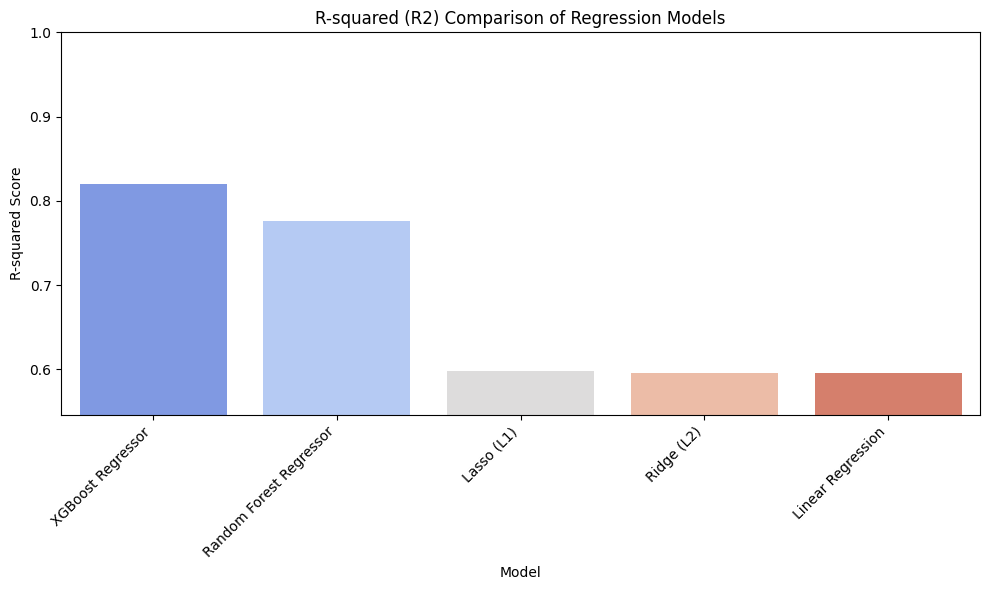

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

df_results = pd.DataFrame(results).T.sort_values(by='R2', ascending=False)

print("\n--- Final Regression Model Comparison (R2 Sorted) ---")
print(df_results.round(4).to_markdown())

# Visualization of R-squared (R2) Score
plt.figure(figsize=(10, 6))
sns.barplot(x=df_results.index, y='R2', data=df_results, palette='coolwarm')
plt.title('R-squared (R2) Comparison of Regression Models')
plt.ylabel('R-squared Score')
plt.xlabel('Model')
plt.xticks(rotation=45, ha='right')
plt.ylim(df_results['R2'].min() - 0.05, 1.0)
plt.tight_layout()
plt.show()

# Interview Insight: R2 measures the proportion of variance in the dependent 
# variable that is predictable from the independent variables. 
# RMSE provides the average magnitude of the error in the original units of the target variable.